In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('C:/Users/Aksiq-Intern/Downloads/Hotel Reviews.csv')

In [4]:
df.head(5)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [5]:
df.shape

(35912, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35888 non-null  object 
 15  reviews.title      

In [7]:
df.isnull().mean()*100


address                   0.000000
categories                0.000000
city                      0.000000
country                   0.000000
latitude                  0.239474
longitude                 0.239474
name                      0.000000
postalCode                0.153152
province                  0.000000
reviews.date              0.721207
reviews.dateAdded         0.000000
reviews.doRecommend     100.000000
reviews.id              100.000000
reviews.rating            2.400312
reviews.text              0.066830
reviews.title             4.527734
reviews.userCity         54.714302
reviews.username          0.119737
reviews.userProvince     51.219648
dtype: float64

### Datatype Conversion:

In [8]:
#convert  reviews.date  and reviews.dateAdded from object to datetime64
df['reviews.date'] = pd.to_datetime(df['reviews.date'], utc=True).dt.tz_localize(None)

df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'], utc=True).dt.tz_localize(None)


### EDA:

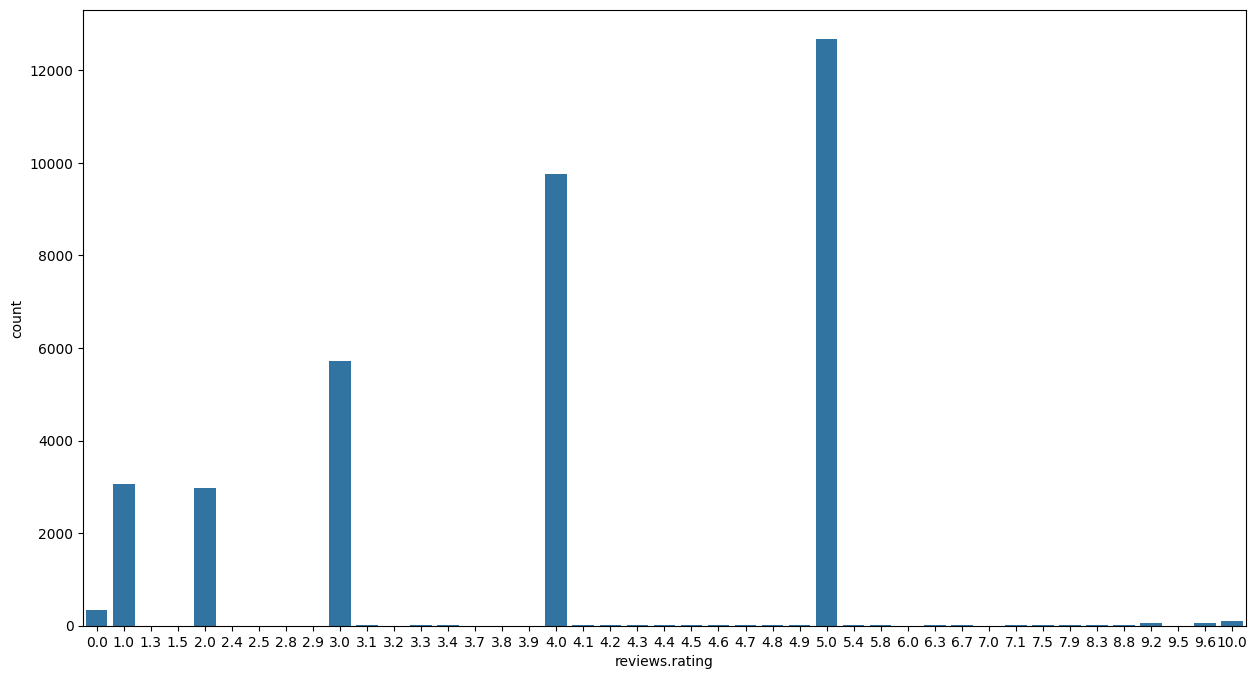

In [9]:
#Visual 1
import seaborn as sns
import matplotlib.pyplot as plt
bar= df["reviews.rating"].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(bar)
plt.show()

In [10]:
#Visual 2
df['reviews.rating'].describe()


count    35050.000000
mean         3.776431
std          1.416195
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: reviews.rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

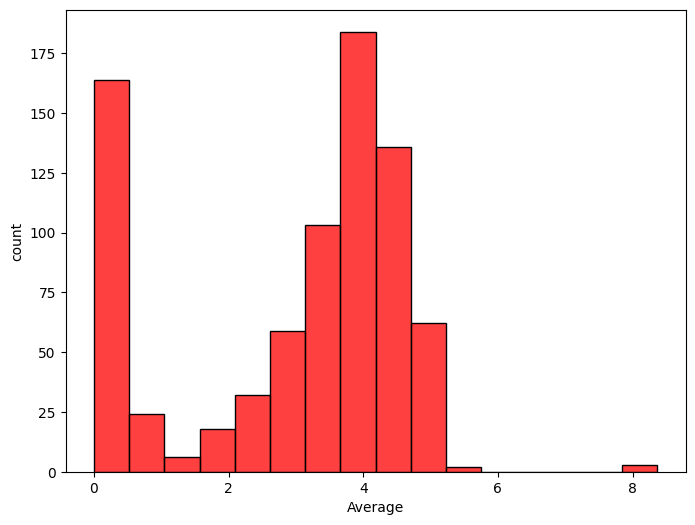

In [11]:
#Visual 3
average_scores = df.groupby('name')['reviews.rating'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.histplot(average_scores['reviews.rating'], color= 'red')
plt.xlabel('Average')
plt.ylabel('count')
plt.show

In [12]:
#Visual 4
average_scores.describe()

,reviews.rating
count,793.000000
mean,2.936221
std,1.739081
min,0.000000
25%,1.735294
50%,3.600000
75%,4.188679
max,8.368932


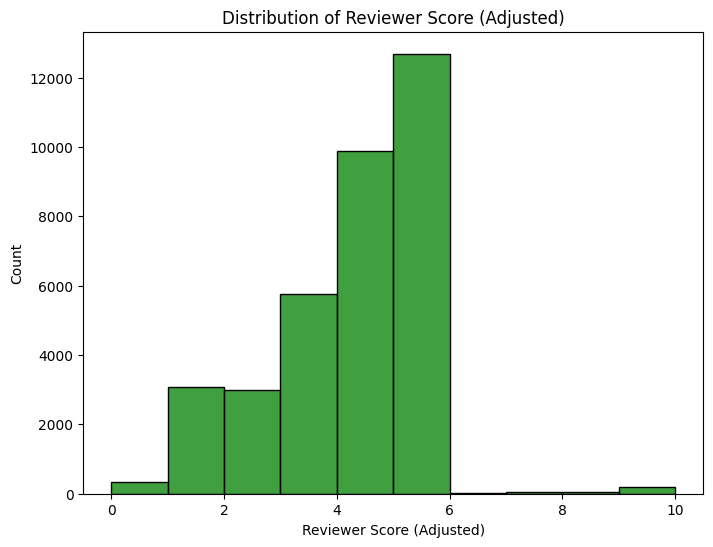

In [13]:
#Visual 5
plt.figure(figsize=(8, 6))  # Set figure size
sns.histplot(df['reviews.rating'], color='green', bins=10, kde=False)

plt.xlabel('Reviewer Score (Adjusted)')
plt.ylabel('Count')
plt.title('Distribution of Reviewer Score (Adjusted)')

plt.show()

C:\Users\Aksiq-Intern\AppData\Local\Temp\ipykernel_6392\2628019338.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='reviews.rating', data=top_cities_df, palette='viridis',


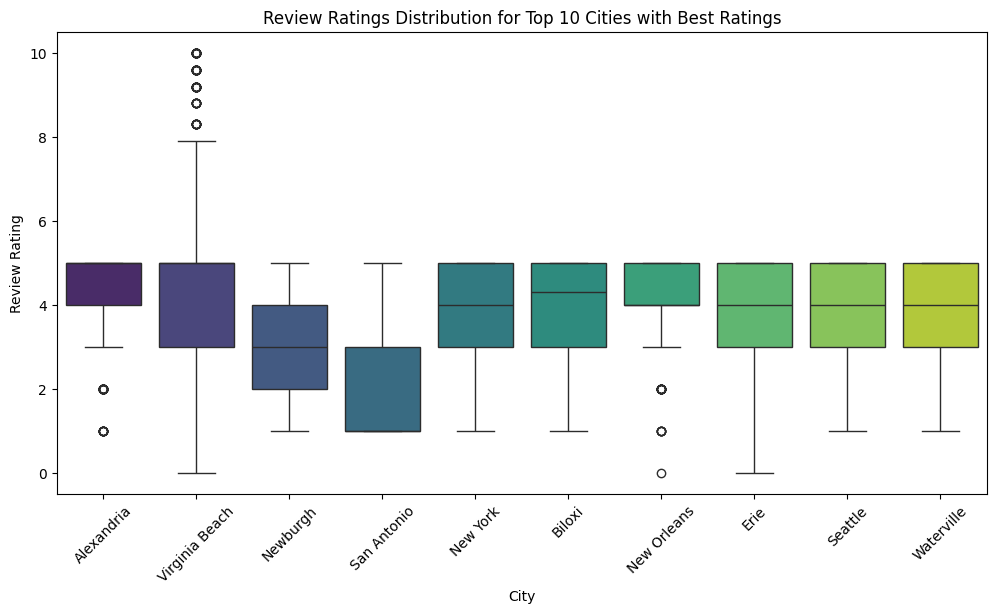

In [15]:
#Visual 6

top_cities= df['city'].value_counts().head(10) 
top_cities_df = df[df['city'].isin(top_cities.index)]  # Filter the original dataset for top 10 cities

plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='reviews.rating', data=top_cities_df, palette='viridis',
            order=top_cities.index)


plt.xlabel('City')
plt.ylabel('Review Rating')
plt.title('Review Ratings Distribution for Top 10 Cities with Best Ratings')
plt.xticks(rotation=45)


plt.show()

In [16]:
#visual 7
top_hotels_df = df.sort_values(by='reviews.rating', ascending=False).head(10)
top_hotels_df = top_hotels_df[['name','reviews.rating']]

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

print(top_hotels_df)

                         name  reviews.rating
9876       Pelican Shores Inn            10.0
9819       Pelican Shores Inn            10.0
9846       Pelican Shores Inn            10.0
9845       Pelican Shores Inn            10.0
9839       Pelican Shores Inn            10.0
9835       Pelican Shores Inn            10.0
4504  Hyatt Regency Kathmandu            10.0
9833       Pelican Shores Inn            10.0
9832       Pelican Shores Inn            10.0
9831       Pelican Shores Inn            10.0


In [17]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#Visual 8
import plotly.express as px


# Check the first few rows to ensure column names
print(df.head())

# Create the map visualization
fig = px.scatter_mapbox(df, 
                        lat="latitude",   # Column for latitude
                        lon="longitude",  # Column for longitude
                        hover_name="name",  # Column for hotel name (use 'name' instead of 'hotel_name')
                        color="name",  # Optionally color by hotel name (if you have different hotels)
                        zoom=3,  # Set zoom level
                        height=600)

# Update the layout (choose a map style)
fig.update_layout(mapbox_style="carto-positron",  # You can change the style
                  title="Hotel Locations",  # Title for the map
                  showlegend=False)  # Disable legend if not needed

# Show the map
fig.show()

                  address categories      city country   latitude  longitude                name postalCode province reviews.date   reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating                                                                                                                                                                                                                                                                                                                                                        reviews.text                       reviews.title reviews.userCity reviews.username reviews.userProvince
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187  Hotel Russo Palace      30126       GA   2013-09-22 2016-10-24 00:00:25                  NaN         NaN             4.0                                                                                                                                                            

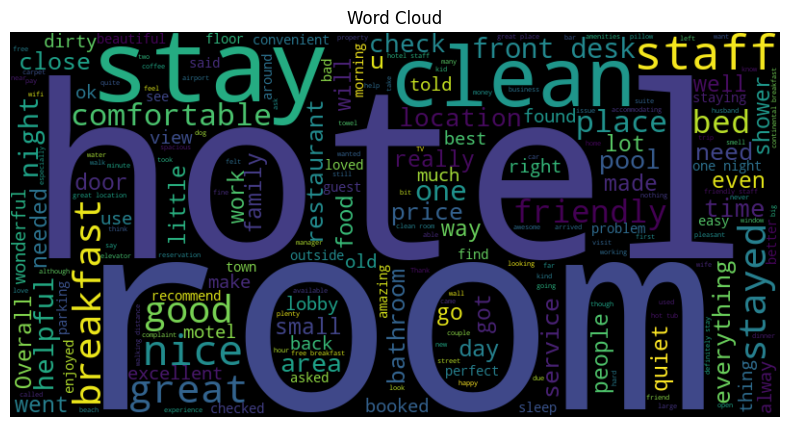

In [24]:
#Visual 10
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure your DataFrame is loaded and 'reviews.text' column exists
text_data = ' '.join(df['reviews.text'].dropna().astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title('Word Cloud')
plt.show()


### Data Preprocessing:

In [10]:

# handling missing values for latitude and Longitude

lat_nulls= df[df['latitude'].isnull()]
lat_nulls['name'].value_counts()

name
Hyatt Dulles                              32
The Inn @ St. Botolph                     26
Sonoma Coast Villa Spa                    10
Holiday Inn Express Howe (sturgis, Mi)     3
Hotel Olcott                               2
Palomar Washington Dc, A Kimpton Hotel     2
Dead Broke Inn                             1
The Miner's Inn Motel Restaurant           1
Leakey Springs Cabins                      1
Alyssa's Motel                             1
Saco River Recreational Council            1
Ubaa Old Crawford Inn                      1
Mountaintop Lodge Bed Breakfast            1
La Quinta                                  1
Americana Resort Properties                1
Busy B Ranch                               1
Motel 6                                    1
Name: count, dtype: int64

In [11]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#pip install geopy
from geopy.geocoders import Nominatim
import pandas as pd


# Initialize geolocator
geolocator = Nominatim(user_agent="hotel_geocoder")

# Example hotel names
hotels = lat_nulls['address']

# Function to get latitude and longitude
def get_coordinates(hotel_name):
    try:
        location = geolocator.geocode(hotel_name)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error for {hotel_name}: {e}")
        return None, None


lat_nulls["latitude"], lat_nulls["longitude"] = zip(*[get_coordinates(hotel) for hotel in hotels])



Error for Rr 302: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Rr+302&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error for 135 Main St: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=135+Main+St&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error for 5460 N River Rd: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=5460+N+River+Rd&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


C:\Users\Aksiq-Intern\AppData\Local\Temp\ipykernel_15864\142941567.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_nulls["latitude"], lat_nulls["longitude"] = zip(*[get_coordinates(hotel) for hotel in hotels])


In [13]:
df["latitude"] = df["latitude"].combine_first(lat_nulls["latitude"])
df["longitude"] = df["longitude"].combine_first(lat_nulls["longitude"])


In [14]:
df.dropna(subset=['latitude','longitude'],inplace=True)

#### Label creation:


In [15]:
df.dropna(subset=['reviews.text'],inplace=True)

In [16]:
df['is_bad_review'] = df['reviews.rating'].apply(lambda x: 1 if x < 5.0 else 0)


In [17]:
df['reviews.text'].isnull().sum()

0

In [18]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
text_df= df[['reviews.text', 'is_bad_review']]

In [20]:
pip install spacy

  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
monty 2024.10.21 requires numpy<2.0.0, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    # Lowercase and process text using SpaCy pipeline
    doc = nlp(text.lower())

    # Tokenize and filter tokens
    tokens = [
        token.text for token in doc
        if not token.is_punct          # Remove punctuation
        and not token.is_digit         # Remove numbers
        and not token.is_stop          # Remove stopwords
        and token.text.strip() != ''   # Remove empty tokens
    ]

    # Join tokens back to a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the function to the DataFrame column
text_df['reviews.text'] = text_df['reviews.text'].apply(preprocess_text_spacy)

C:\Users\Aksiq-Intern\AppData\Local\Temp\ipykernel_15864\4262384855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['reviews.text'] = text_df['reviews.text'].apply(preprocess_text_spacy)


In [22]:
text_df= df[['reviews.text','is_bad_review']]
text_df.isnull().sum()


reviews.text     0
is_bad_review    0
dtype: int64

In [23]:
#weirdo case

df[df['reviews.text'].str.contains('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', na=False)]

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,is_bad_review
98,316 N Main St,"Motels,Hotels,Restaurants,Bed & Breakfast & Inns",Neihart,US,46.933598,-110.735886,Little Belt Inn Neihart,59465,MT,NaT,2016-06-16 21:25:59,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1
247,1932 Lima Sandusky Rd,"Lodging,Corporate Lodging,Hotels",Sandusky,US,41.441440,-82.797050,Howard Johnson,44870,Bloomingville,NaT,2016-03-28 15:01:37,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1
1101,1105 Sawmill Rd,"Banquet Halls & Reception Facilities,Meeting &...",Laurel,US,31.693611,-89.132890,Ramada,39440,Calhoun,NaT,2016-04-03 12:13:24,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1
1390,18980 Upper Belmont Pl,"Conference & Convention Centers,Wholesale Copi...",Leesburg,US,39.094056,-77.485577,The National Conference Center,20176,VA,2016-01-25,2017-02-13 22:47:36,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,"Friendly staff, clean room.",Sanford,xxxxxxxxxxxxxx,FL,1
1454,595 Vail Valley Dr,"Resorts,Places Of Interest,Tourist Information...",Vail,US,39.638700,-106.368201,Manor Vail Lodge,81657,West Vail,2012-03-22,2016-05-25 05:32:01,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34158,214 N Hunter Hwy,"Hotels,Lodging,Hotel,Motels,B&bs / Inns",Drums,US,41.032530,-75.953350,Nesco Manor Hotel,18222,PA,NaT,2016-04-03 12:01:58,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1
34750,612 Court Ave,"Hotels,Lodging,Motels",Gaylord,US,44.555650,-94.223680,Motel 6,55334,MN,NaT,2016-03-27 14:54:29,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1
35276,250 Msgr O'brien Hwy,"Hotels,hotel",Cambridge,US,42.373389,-71.081492,Holiday Inn Express Hotel and Suites Cambridge,2141,MA,2016-07-19,2016-10-29 19:04:25,NaN,NaN,4.0,Uneventful. And that's a good thing. xxxxxxxxx...,just ok,Ringwood,Grace W,NJ,1
35419,720 Lamont St S,Hotels,Aberdeen,US,45.457684,-98.441345,The Dec,57401,Ordway,NaT,2016-02-17 03:03:23,NaN,NaN,0.0,xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx,NaN,NaN,xxxxxxxxxxxxxx,NaN,1


In [24]:
text_df.isnull().sum()

reviews.text     0
is_bad_review    0
dtype: int64

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)  # Only consider words that appear in at least 10 documents
tfidf_matrix = vectorizer.fit_transform(text_df['reviews.text'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add the TF-IDF columns to the original DataFrame
text_df = pd.concat([text_df, tfidf_df], axis=1)


In [26]:
text_df

,reviews.text,is_bad_review,00,000,00am,00pm,10,100,101,109,...,zero,zimmer,zion,zip,zona,zone,zoo,zu,zum,zur
0,Pleasant 10 min walk along the sea front to th...,1.0,0.0,0.0,0.0,0.0,0.223312,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Really lovely hotel. Stayed on the very top fl...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ett mycket bra hotell. Det som drog ner betyge...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,We stayed here for four nights in October. The...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,We stayed here for four nights in October. The...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28179,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29660,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31721,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32224,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
text_df.isnull().sum()

reviews.text     29
is_bad_review    29
00               29
000              29
00am             29
                 ..
zone             29
zoo              29
zu               29
zum              29
zur              29
Length: 5674, dtype: int64

In [28]:
text_df.dropna(inplace=True)

In [29]:
pip install gensim


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
#pip install gensim
from gensim.models.doc2vec import TaggedDocument

# Example: Assuming reviews is a list of raw review texts

# Create TaggedDocument objects
tokenized_reviews= text_df['reviews.text']
tagged_reviews = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(tokenized_reviews)]



In [31]:
text_df[text_df['reviews.text'].isnull()].index

Index([], dtype='int64')

In [32]:
from gensim.models import Doc2Vec

# Initialize and train the model
model = Doc2Vec(vector_size=5, # Size of the document vector
                window=5,         # Context window size
                min_count=2,      # Ignores words with total frequency lower than this
                workers=4,        # Number of threads
                epochs=20)        # Number of training epochs

# Build vocabulary
model.build_vocab(tagged_reviews)

# Train the model
model.train(tagged_reviews, total_examples=model.corpus_count, epochs=model.epochs)


In [33]:
# Get vectors for the training documents
document_vectors = [model.dv[str(i)] for i in range(len(text_df['reviews.text']))]

# Example: Use vector for a specific reviewie
specific_vector = model.dv['0']  # Vector for the first review

df2 = pd.DataFrame(document_vectors)

In [34]:
df2 = df2.rename(columns={0: "doc2vec_vector_0", 
                          1: "doc2vec_vector_1", 
                          2: "doc2vec_vector_2", 
                          3: "doc2vec_vector_3", 
                          4: "doc2vec_vector_4"})



In [35]:
df1 = text_df.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

result = pd.concat([df1, df2], axis=1)
result


,reviews.text,is_bad_review,00,000,00am,00pm,10,100,101,109,...,zone,zoo,zu,zum,zur,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,Pleasant 10 min walk along the sea front to th...,1.0,0.0,0.0,0.0,0.0,0.223312,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232388,0.393662,-0.718335,0.695720,-0.076860
1,Really lovely hotel. Stayed on the very top fl...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.508100,0.556234,0.200007,0.927369,0.837610
2,Ett mycket bra hotell. Det som drog ner betyge...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.100934,0.513594,-0.272141,0.166384,-0.015626
3,We stayed here for four nights in October. The...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.505181,0.198452,-0.004011,0.125693,0.203772
4,We stayed here for four nights in October. The...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.404092,0.524224,-0.056717,-0.095528,0.197176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35849,We stayed 3 nights in theTouch of Class cabin ...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.163453,0.069409,-0.610898,0.714527,-0.167984
35850,My husband and I came for the weekend to celeb...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.481864,-0.047506,0.032541,1.005712,0.043156
35851,Excellent! Very nice cabins! Felt like home! T...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.874064,0.567885,0.263728,1.338399,0.855678
35852,This is our 5th trip to Tennessee in 2 1/2 yea...,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.312717,0.012802,-0.225903,0.660114,-0.042498


In [36]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk



nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()


def get_sentiment_scores(review):
    scores = analyzer.polarity_scores(review)
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

result[['neg', 'neu', 'pos', 'compound']] = result['reviews.text'].apply(get_sentiment_scores)




[nltk_data] Downloading package vader_lexicon to C:\Users\Aksiq-
[nltk_data]     Intern\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



X = result.drop(columns=['reviews.text', 'is_bad_review'])
y = result['is_bad_review']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7007390879933064
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.50      0.56      2721
         1.0       0.73      0.82      0.77      4450

    accuracy                           0.70      7171
   macro avg       0.68      0.66      0.67      7171
weighted avg       0.69      0.70      0.69      7171

